# Task 2

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from surprise import SVD, KNNBasic
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report
import warnings
warnings.filterwarnings('ignore')

## Part-2

In [39]:
data = pd.read_csv('datasets/MovieRating/ratings_small.csv')
data.sample(5)

,userId,movieId,rating,timestamp
72926,509,3362,4.0,978936145
23151,164,4306,4.0,1178928048
36311,262,5433,2.5,1466555214
74248,518,920,4.0,945362805
11453,73,61248,3.0,1369514646


## Part-3

In [40]:
data = data.drop('timestamp', axis=1)

In [41]:
data.shape

(100004, 3)

In [42]:
data.sample(5)

,userId,movieId,rating
65666,468,21,2.5
99753,667,225,3.0
18341,119,5060,5.0
97533,654,520,4.0
32707,236,1333,4.5


In [43]:
reader = Reader(rating_scale=(1, 5))
ratings = Dataset.load_from_df(data, reader)

In [44]:
type(ratings)

surprise.dataset.DatasetAutoFolds

## 3(c) Compute the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation (10 points)

### Use Probabilistic Matrix Factorization(PMF)

In [45]:
model_pmf = SVD()
model_pmf_cv = cross_validate(model_pmf, ratings, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9016  0.9003  0.8993  0.8954  0.8833  0.8960  0.0067  
MAE (testset)     0.6932  0.6930  0.6894  0.6904  0.6804  0.6893  0.0047  
Fit time          0.93    0.95    0.98    0.94    0.91    0.94    0.02    
Test time         0.13    0.15    0.11    0.28    0.20    0.17    0.06    


In [46]:
avg_pmf_rmse = np.average(model_pmf_cv['test_rmse'])
avg_pmf_mae = np.average(model_pmf_cv['test_mae'])
print('Average of RMSE for Probabilistic Matrix Factorization(PMF) = ', avg_pmf_rmse)
print('Average of MAE for Probabilistic Matrix Factorization(PMF) = ', avg_pmf_mae)

Average of RMSE for Probabilistic Matrix Factorization(PMF) =  0.8959673290719786
Average of MAE for Probabilistic Matrix Factorization(PMF) =  0.6892797825953401


### Use User-based collaborative filtering (UCF)

In [47]:
sim_options = {'name': 'cosine', 'user_based': True}
model_ucf = KNNBasic(sim_options=sim_options)
model_ucf_cv = cross_validate(model_ucf, ratings, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9941  0.9907  1.0036  0.9903  0.9851  0.9928  0.0061  
MAE (testset)     0.7661  0.7657  0.7774  0.7647  0.7618  0.7671  0.0053  
Fit time          0.58    0.44    0.41    0.47    0.45    0.47    0.06    
Test time         1.87    1.35    1.38    1.42    1.59    1.52    0.19    


In [48]:
avg_ucf_rmse = np.average(model_ucf_cv['test_rmse'])
avg_ucf_mae = np.average(model_ucf_cv['test_mae'])
text_1 = f"Average of RMSE for User-based collaborative filtering (UCF) = {avg_ucf_rmse}<br>Average of MAE for User-based collaborative filtering (UCF) = {avg_ucf_mae}<br>"

display(Markdown(text_1))

Average of RMSE for User-based collaborative filtering (UCF) = 0.99277734823901<br>Average of MAE for User-based collaborative filtering (UCF) = 0.7671270142606956<br>

## Use Item-based collaborative filtering (ICF)

In [49]:
sim_options = {'name': 'cosine', 'user_based': False}
model_icf = KNNBasic(sim_options=sim_options)
model_icf_cv = cross_validate(model_icf, ratings, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9882  1.0032  0.9911  0.9944  0.9934  0.9941  0.0050  
MAE (testset)     0.7703  0.7811  0.7729  0.7729  0.7744  0.7743  0.0036  
Fit time          5.88    5.43    5.23    5.16    5.15    5.37    0.27    
Test time         5.39    5.40    5.00    5.11    5.31    5.24    0.16    


In [50]:
avg_icf_rmse = np.average(model_icf_cv['test_rmse'])
avg_icf_mae = np.average(model_icf_cv['test_mae'])
print('Average of RMSE for Item-based collaborative filtering (ICF) = ', avg_icf_rmse)
print('Average of MAE for Item-based collaborative filtering (ICF) = ', avg_icf_mae)

Average of RMSE for Item-based collaborative filtering (ICF) =  0.9940500082261657
Average of MAE for Item-based collaborative filtering (ICF) =  0.7743274870918064


### 3(d) Compare the average (mean) performances of User-based collaborative filtering, item-based collaborative filtering, PMF with respect to RMSE and MAE. Which ML model is the best in the movie rating data? (10 points

In [51]:
text = f"""|Algo|Mean RMSE|Mean MAE|
|----|---------|--------|
|Probability Matrix Factorization|{avg_pmf_rmse}|{avg_pmf_mae}|
|User-based collaborative filtering|{avg_ucf_rmse}|{avg_ucf_mae}|
|Item-based collaborative filtering|{avg_icf_rmse}|{avg_icf_mae}|"""
display(Markdown(text))

|Algo|Mean RMSE|Mean MAE|
|----|---------|--------|
|Probability Matrix Factorization|0.8959673290719786|0.6892797825953401|
|User-based collaborative filtering|0.99277734823901|0.7671270142606956|
|Item-based collaborative filtering|0.9940500082261657|0.7743274870918064|

Looking at the table, we see User-based collaborative filtering and Item-based collaborative filtering are pretty similar in performance.

But on pure numbers perspective, Item-based collaborative filtering is the better model for movie rating data for both RMSE and MAE

## 3(e) Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering. Plot your results. Is the impact of the three metrics on User based Collaborative Filtering consistent with the impact of the three metrics on Item based Collaborative Filtering? (10 points)

In [52]:
# Item-based collaborative filtering
sim_options_cosine = {
    "name": 'cosine',
    'user_based': False
}

sim_options_msd = {
    "name": 'msd',
    'user_based': False
}

sim_options_pearson = {
    "name": 'pearson',
    'user_based': False
}

In [53]:
model_icf_cosine = KNNBasic(sim_options=sim_options_cosine)
model_icf_cosine_cv = cross_validate(algo=model_icf_cosine, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_icf_msd = KNNBasic(sim_options=sim_options_msd)
model_icf_msd_cv = cross_validate(algo=model_icf_msd, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_icf_pearson = KNNBasic(sim_options=sim_options_pearson)
model_icf_pearson_cv = cross_validate(algo=model_icf_pearson, data=ratings, measures=['RMSE'], cv=5, verbose=True)

avg_model_icf_cosine_cv = np.average(model_icf_cosine_cv['test_rmse'])
avg_model_icf_msd_cv = np.average(model_icf_msd_cv['test_rmse'])
avg_model_icf_pearson_cv = np.average(model_icf_pearson_cv['test_rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9981  0.9984  0.9979  0.9945  0.9864  0.9951  0.0046  
Fit time          5.15    5.48    5.19    5.55    5.47    5.37    0.16    
Test time         4.85    4.96    6.03    6.36    6.61    5.76    0.73    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

In [54]:
# User-based collaborative filtering
sim_options_cosine = {
    "name": 'cosine',
    'user_based': True
}

sim_options_msd = {
    "name": 'msd',
    'user_based': True
}

sim_options_pearson = {
    "name": 'pearson',
    'user_based': True
}

In [55]:
model_ucf_cosine = KNNBasic(sim_options=sim_options_cosine)
model_ucf_cosine_cv = cross_validate(algo=model_ucf_cosine, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_ucf_msd = KNNBasic(sim_options=sim_options_msd)
model_ucf_msd_cv = cross_validate(algo=model_ucf_msd, data=ratings, measures=['RMSE'], cv=5, verbose=True)

model_ucf_pearson = KNNBasic(sim_options=sim_options_pearson)
model_ucf_pearson_cv = cross_validate(algo=model_ucf_pearson, data=ratings, measures=['RMSE'], cv=5, verbose=True)

avg_model_ucf_cosine_cv = np.average(model_ucf_cosine_cv['test_rmse'])
avg_model_ucf_msd_cv = np.average(model_ucf_msd_cv['test_rmse'])
avg_model_ucf_pearson_cv = np.average(model_ucf_pearson_cv['test_rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9929  0.9951  0.9929  0.9873  0.9976  0.9932  0.0034  
Fit time          0.39    0.44    0.47    0.41    0.44    0.43    0.03    
Test time         1.56    1.33    1.64    1.41    1.62    1.51    0.12    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done com

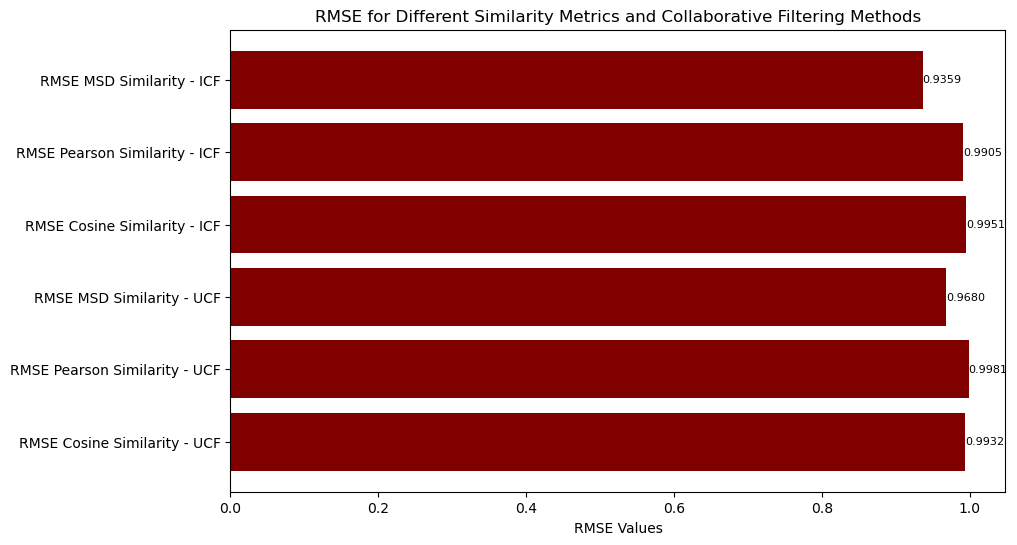

In [56]:
final_res = {
    'RMSE Cosine Similarity - UCF': avg_model_ucf_cosine_cv,
    'RMSE Pearson Similarity - UCF': avg_model_ucf_pearson_cv,
    'RMSE MSD Similarity - UCF': avg_model_ucf_msd_cv,
    'RMSE Cosine Similarity - ICF': avg_model_icf_cosine_cv,
    'RMSE Pearson Similarity - ICF': avg_model_icf_pearson_cv,
    'RMSE MSD Similarity - ICF': avg_model_icf_msd_cv
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(
    list(final_res.keys()), list(final_res.values()),
    color='maroon',
    label=list(final_res.values())
)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', 
             va='center', ha='left', fontsize=8, color='black')

ax.set_xlabel('RMSE Values')
ax.set_title('RMSE for Different Similarity Metrics and Collaborative Filtering Methods')
plt.show()

In [57]:
text = ""
text += f"Looking at the graph above Item CF ({avg_model_icf_msd_cv}) achieves **lower RMSE**"
text += f" Accuracy than User CF ({avg_model_ucf_msd_cv}) for **MSD** similarity measure, **lower RMSE** Accuracy({avg_model_icf_pearson_cv})"
text += f" than User CF ({avg_model_ucf_pearson_cv}) for **Pearson similarity measure** and higher RMSE Accuracy({avg_model_icf_cosine_cv})"
text += f" than User CF({avg_model_ucf_cosine_cv}) for **Cosine** similarity measure."

display(Markdown(text))

Looking at the graph above Item CF (0.9358584941087761) achieves **lower RMSE** Accuracy than User CF (0.9679553041560981) for **MSD** similarity measure, **lower RMSE** Accuracy(0.9905037778015569) than User CF (0.9980872014744785) for **Pearson similarity measure** and higher RMSE Accuracy(0.9950725835483034) than User CF(0.9931641990449147) for **Cosine** similarity measure.

While the difference is not significant for Pearson and Cosine, but looking at the pure numbers, the impact of the 3 metrics is not significantly consistent between User-based collaborative filtering and Item-based collaborative filtering.

## 3(f) Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering? Plot your results. 

In [58]:
k_values = np.arange(5, 41, 5)

def evaluate_rmse_for_different_k(model: KNNBasic, data: any):
    cv_results = cross_validate(model, data, measures=['RMSE'], cv=5)
    return np.average(cv_results['test_rmse'])
    
sim_options_icf = {
    "name": 'cosine',
    "user_based": False
}

sim_options_ucf = {
    "name": 'cosine',
    'user_based': True
}

results = {}
for k_val in k_values:
    model_icf = KNNBasic(k=k_val, sim_options=sim_options_icf)
    model_ucf = KNNBasic(k=k_val, sim_options=sim_options_ucf)
    
    acc_icf_rmse = evaluate_rmse_for_different_k(model=model_icf, data=ratings)
    acc_ucf_rmse = evaluate_rmse_for_different_k(model=model_ucf, data=ratings)
    results[k_val] = (acc_icf_rmse, acc_ucf_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

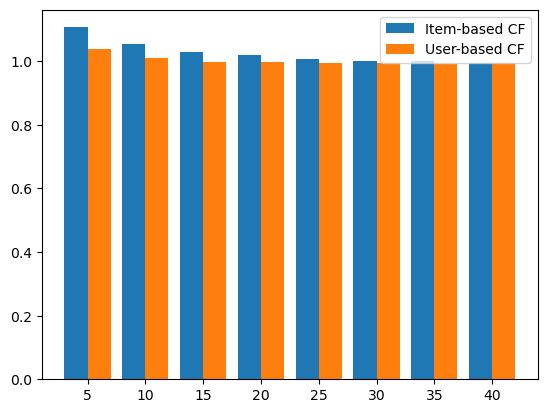

{5: (1.1069462992523704, 1.0398187263163332), 10: (1.0533455675091337, 1.0090651380696547), 15: (1.03035615507323, 0.9985015371826732), 20: (1.0186059029282277, 0.9972332510723634), 25: (1.0086583353203067, 0.9960584169543955), 30: (1.0022145637303363, 0.9947805488402534), 35: (0.9995955464822822, 0.9926117244386091), 40: (0.9951075995693298, 0.9939910395543123)}


In [59]:
fig, ax = plt.subplots()
X = list(results.keys())
X_axis = np.arange(len(X))
bar1 = ax.bar(X_axis - 0.2, [x[0] for x in results.values()], width = 0.4, label='Item-based CF')
bar2 = ax.bar(X_axis + 0.2, [x[1] for x in results.values()], width = 0.4, label='User-based CF')

ax.set_xticks(X_axis, X)
ax.legend()
plt.show()
print(results)

Examining the graph, we observe a consistent accuracy gap between Item-based Collaborative Filtering (ICF) and User-based Collaborative Filtering (UCF), with ICF consistently outperforming UCF. The number of neighbors does not appear to significantly impact the consistency of performance. However, it is notable that the RMSE accuracy keeps reducing after K value is computed.

## 3(g) Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering? (10 points)

In [60]:
k_for_min_ucf_rmse = min(results, key=lambda x : results[x][1])
k_for_min_icf_rmse = min(results, key=lambda x : results[x][0])
text = ""
text += f"K = {k_for_min_icf_rmse} has the lowest RMSE so is the best number of neighbors for Item based collaborative filtering."
text += f" K = {k_for_min_ucf_rmse} is the lowest RMSE and best number of neighbors for User-based collaborative filtering."
display(Markdown(text))

K = 40 has the lowest RMSE so is the best number of neighbors for Item based collaborative filtering. K = 35 is the lowest RMSE and best number of neighbors for User-based collaborative filtering.

No, the best K of User based collaborative filtering is not the same with the best K of Item based collaborative filtering.